In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.color import rgb2gray

%matplotlib inline

In [4]:
images = np.load("data/stage1_train_images.npy")

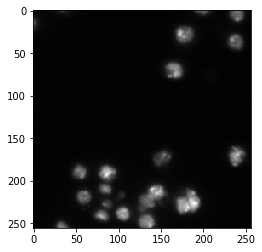

In [5]:
plt.imshow(rgb2gray(images[0]), cmap='gray')

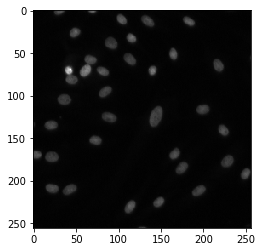

In [6]:
plt.imshow(rgb2gray(images[1]), cmap='gray')

## Taille des images inégale

In [9]:
data = pd.DataFrame()
data['sx'] = pd.Series([img.shape[0] for img in images])
data['sy'] = pd.Series([img.shape[1] for img in images])
data['sz'] = pd.Series([img.shape[2] for img in images])

In [11]:
data.min()

sx    256
sy    256
sz      4
dtype: int64

In [12]:
data.max()

sx    1040
sy    1388
sz       4
dtype: int64

In [13]:
data.describe()

,sx,sy,sz
count,670.000000,670.000000,670.0
mean,333.991045,378.500000,4.0
std,149.474845,204.838693,0.0
min,256.000000,256.000000,4.0
25%,256.000000,256.000000,4.0
50%,256.000000,320.000000,4.0
75%,360.000000,360.000000,4.0
max,1040.000000,1388.000000,4.0


## Recherche de seuil

In [14]:
from skimage.filters import threshold_otsu

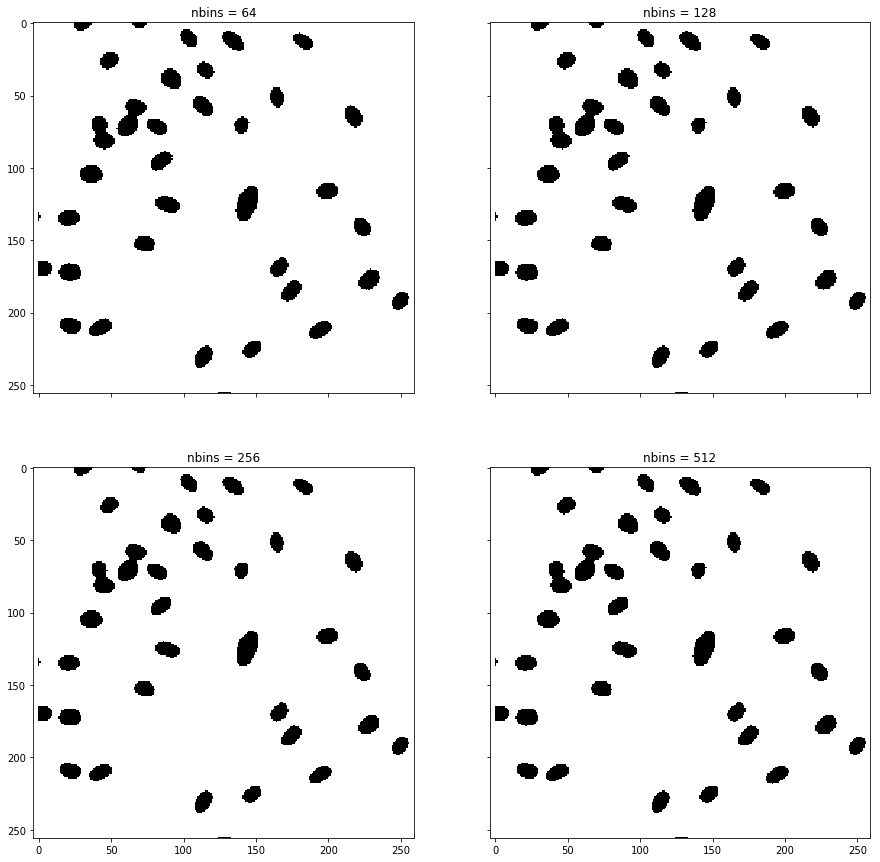

In [26]:
img = images[1]
# Convert to bw
img_bw = rgb2gray(img)

# Find optimal threshold
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15, 15))
for i, nbins in enumerate([64, 128, 256, 512]):
    ax = axes[i // 2, i % 2]
    thrsh = threshold_otsu(img_bw, nbins=nbins)
    ax.imshow(img_bw <= thrsh, cmap='gray')
    ax.set_title("nbins = {:d}".format(nbins))

In [27]:
thresh = threshold_otsu(img_bw)

binary_img = img_bw <= thresh

In [31]:
from skimage.morphology import label

labelled_image = label(binary_img < 0.5)

l_min = 1
l_max = labelled_image.max()

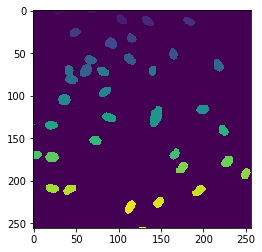

In [32]:
plt.imshow(labelled_image)

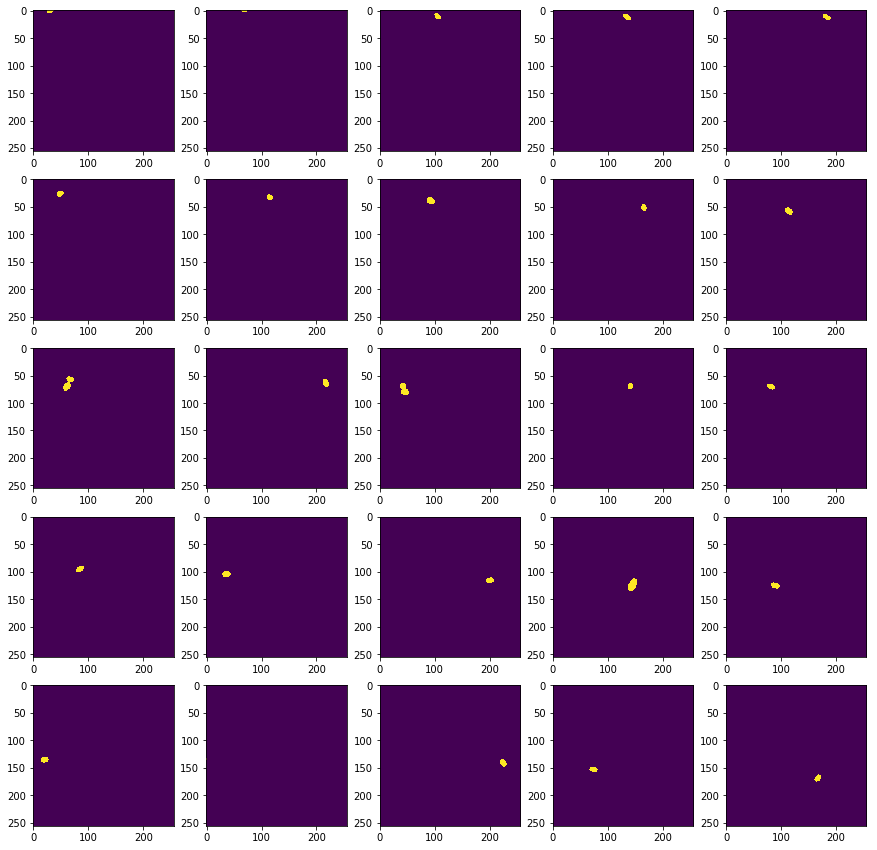

In [33]:
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
for i in range(25):
    ax = axes[i // 5, i % 5]
    ax.imshow(labelled_image == i+1)
    